# 作业五：层次聚类
- 姓名：韩佳迅
- 学号：2012682
- 专业：计算机科学与技术

### 实验要求
题目：层次聚类

#### 基本要求：
a) 实现single-linkage层次聚类算法； 

b) 实现complete-linkage层次聚类算法；

#### 中级要求

a) 实现average-linkage层次聚类算法； 

b) 将上述三种算法的性能进行简要对比；

#### 高级要求

通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；


#### 数据集：数据自行生成¶

注：数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签。


**截止日期：12月2日**
- 发送到邮箱：2120220594@mail.nankai.edu.cn

## 基本要求：

a) 实现single-linkage层次聚类算法； 

b) 实现complete-linkage层次聚类算法；

## 中级要求

a) 实现average-linkage层次聚类算法； 

b) 将上述三种算法的性能进行简要对比；

In [16]:
import numpy as np

MAX_NUM = 1e3

# method
def singleLinkage(X, setList=None, allDist=None, dest=None, src=None):
    # your code
    res=[]
    for i in range(X.shape[1]):
        res.append(min(X[0][i],X[1][i]))
    return res
    
def completeLinkage(X, setList=None, allDist=None, dest=None, src=None):
    # your code
    res=[]
    for i in range(X.shape[1]):
        res.append(max(X[0][i],X[1][i]))
    return res

def averageLinkage(X, setList, allDist ,dest, src):
    # your code
    dest_points=setList[dest]
    src_points=setList[src]
    new_points=dest_points+src_points
    res=[]
    # 遍历当前的每个类
    for i in range(X.shape[1]):
        G_points = setList[i] # 得到每个类的节点们
        # 计算两个类 new 和 G 之间，任意两个样本（new_points、G_points）之间距离的平均值
        disSum = 0
        for m in new_points:
            for n in G_points:
                disSum += allDist[m][n]
        res.append( disSum / (len(G_points)*len(new_points)) )
    return res


class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt))+MAX_NUM
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest,src = int(res/clusterCount),res%clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest,src]],setList,allDist,dest,src)
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            #if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
             #   print(clusterCount, " clusters left.")

        print("cluster finish !")

    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

In [13]:
# 计算排列组合
def permute(nums):
        from itertools import permutations
        result = []
        for i in permutations(nums,len(nums)):
            result.append(list(i))
            
        return result

In [14]:
# 计算 accuracy
def cal_acc(k,labels_true,labels_predict):
    acc=0
    combinations = permute(list(range(k))) # 得到1 ~ k 的组合们
    for comb in combinations:
        # labels_true范围：0 ~ 3，model.label(k)范围：1 ~ k
        # comb：1 ~ k 的一个组合
        predict = [comb[x-1] for x in labels_predict] # 将预测值排列组合
        temp = sum([1 for i in range(len(predict)) if predict[i]==labels_true[i]])/len(predict)
        if(temp>acc):
            acc=temp
    return acc

generate data finish!
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
accuracy = 0.5005
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster fini

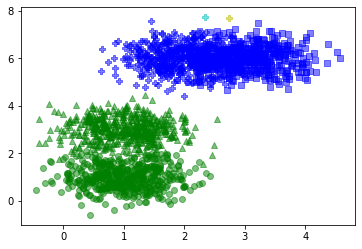

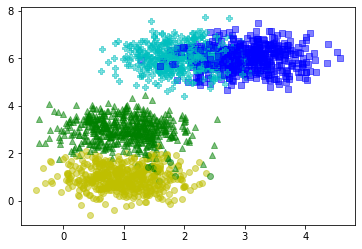

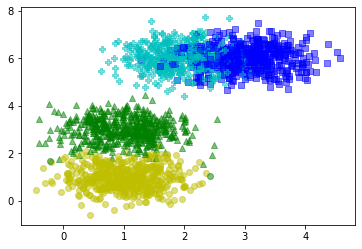

In [15]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets._samples_generator import make_blobs 
#导入错误，将原samples_generator改为_samples_generator

def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true

def plot_data(*data):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict,cnt=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)

centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
# np.savetxt('C:/Users/liminglei/Meachine Learning/experiment5/data.dat',X)
# np.savetxt('C:/Users/liminglei/Meachine Learning/experiment5/label.dat',labels_true)
print("generate data finish!")

METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt=0
for method in METHOD_APPLY:
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k),cnt)
    cnt+=1
    
    # 计算准确率
    acc = cal_acc(k,labels_true,model.label(k))
    print("accuracy =",acc)
    print("-------Segmentation-------")


### 分析一

* 通过计算三种算法在聚类簇个数都为4时的分类准确率（见上文打印），分析三种算法的性能：

  * singleLinkage 的准确率较低，明显不如 completeLinkage 和 averageLinkage

  * completeLinkage 和 averageLinkage 的准确率可以达到 0.95 以上，具有很好的分类效果

  * 从图中可以看出，completeLinkage 和 averageLinkage 可以明显分出四个聚类簇，而 singleLinkage 只分出了部分聚类簇，并存在将不同类没有分开的问题

## 高级要求

通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；



==================== k : 2 ====================
calculate distance finish!
calculate cluster distance finish!
cluster finish !
singleLinkage accuracy = 0.25
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
cluster finish !
completeLinkage accuracy = 0.25
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
cluster finish !
averageLinkage accuracy = 0.25
-------Segmentation-------
==================== k : 3 ====================
calculate distance finish!
calculate cluster distance finish!
cluster finish !
singleLinkage accuracy = 0.5
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
cluster finish !
completeLinkage accuracy = 0.7445
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
cluster finish !
averageLinkage accuracy = 0.5
-------Segmentation-------
==================== k : 4 ====================
calculate distance finish!
calcula

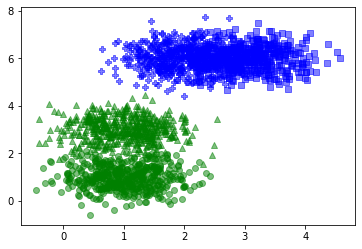

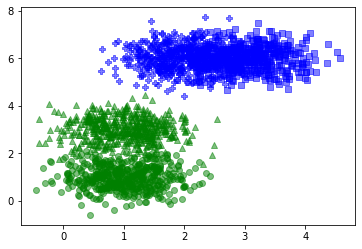

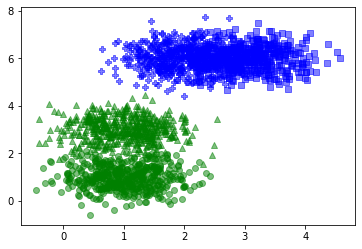

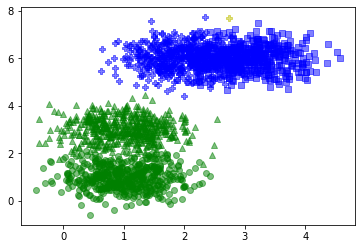

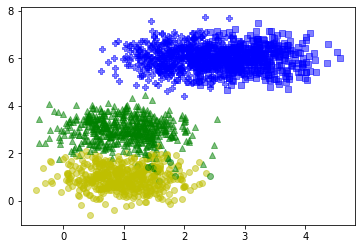

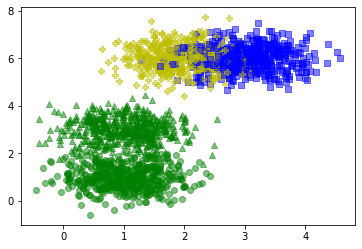

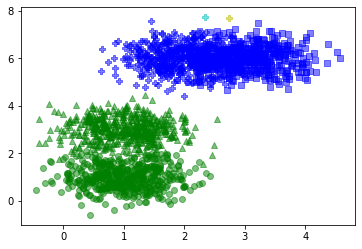

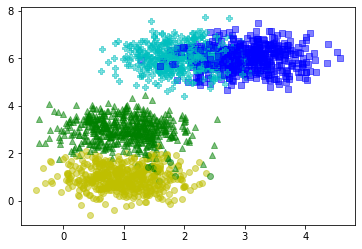

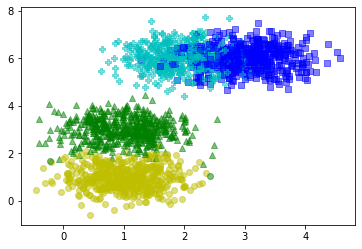

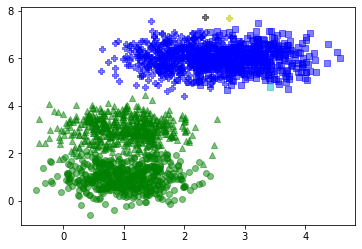

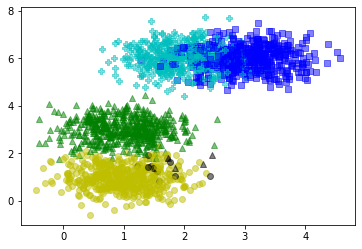

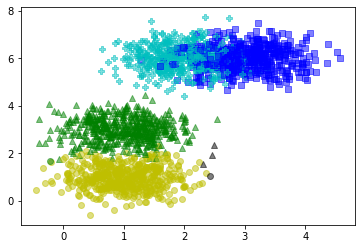

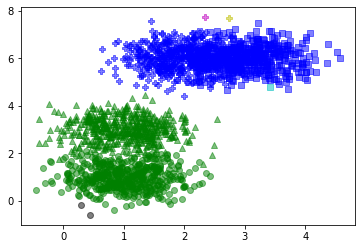

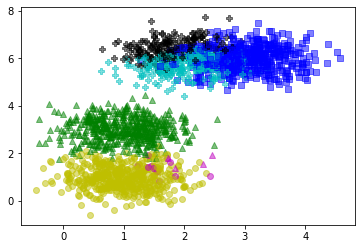

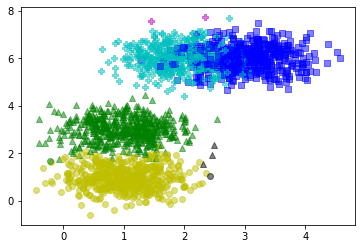

In [17]:
cnt=0
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]
METHOD_APPLY_NAME = ["singleLinkage","completeLinkage","averageLinkage"]
clusters = [2,3,4,5,6]
res = []

for k in clusters:
    res_k=[]
    print("==================== k :",k,"====================")
    for i in range(len(METHOD_APPLY)):
        method=METHOD_APPLY[i]
        model = AgglomerativeClustering()
        model.fit(X,method)
        plot_data(X,labels_true,model.label(k),cnt)
        cnt+=1

        # 计算准确率
        acc = cal_acc(k,labels_true,model.label(k))
        print(METHOD_APPLY_NAME[i],"accuracy =",acc)
        res_k.append(acc)
        
        print("-------Segmentation-------")
    res.append(res_k)

 ==================  singleLinkage 层次聚类算法的accuracy ================== 
聚类簇的个数 = 2 的 accuracy = 0.25
聚类簇的个数 = 3 的 accuracy = 0.5
聚类簇的个数 = 4 的 accuracy = 0.5005
聚类簇的个数 = 5 的 accuracy = 0.5
聚类簇的个数 = 6 的 accuracy = 0.501


 ==================  completeLinkage 层次聚类算法的accuracy ================== 
聚类簇的个数 = 2 的 accuracy = 0.25
聚类簇的个数 = 3 的 accuracy = 0.7445
聚类簇的个数 = 4 的 accuracy = 0.993
聚类簇的个数 = 5 的 accuracy = 0.991
聚类簇的个数 = 6 的 accuracy = 0.891


 ==================  averageLinkage 层次聚类算法的accuracy ================== 
聚类簇的个数 = 2 的 accuracy = 0.25
聚类簇的个数 = 3 的 accuracy = 0.5
聚类簇的个数 = 4 的 accuracy = 0.995
聚类簇的个数 = 5 的 accuracy = 0.9935
聚类簇的个数 = 6 的 accuracy = 0.9925




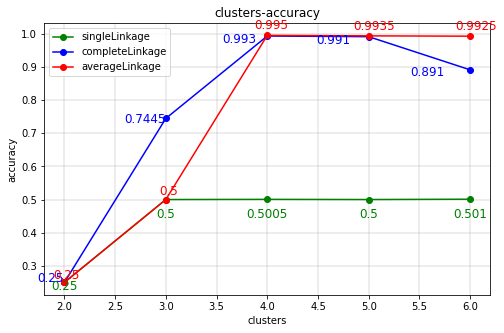

In [18]:
for i in range(len(METHOD_APPLY_NAME)):
    print(" ================== ",METHOD_APPLY_NAME[i],"层次聚类算法的accuracy ================== ")
    for k in clusters:
        print('聚类簇的个数 = '+str(k)+" 的 accuracy = "+str(res[k-2][i]))
    print("\n")


# 绘图
import matplotlib.pyplot as plt

res_p=np.array(res).T

plt.figure(num=3,figsize=(8,5))
plt.grid( ls = '-', lw = 0.45)
plt.plot(clusters,res_p[0],'g.-',linewidth=1.5, markersize=12, label=METHOD_APPLY_NAME[0])
plt.plot(clusters,res_p[1],'b.-',linewidth=1.5, markersize=12, label=METHOD_APPLY_NAME[1])
plt.plot(clusters,res_p[2],'r.-',linewidth=1.5, markersize=12, label=METHOD_APPLY_NAME[2])
plt.title("clusters-accuracy")
plt.xlabel('clusters')
plt.ylabel('accuracy')
plt.legend()
for a, b in zip(clusters, res_p[0]):
    plt.text(a, b*0.87, b, ha='center', va='bottom', fontsize=12, color='green')
    
for a, b in zip(clusters, res_p[1]):
    plt.text(a*0.93, b*0.97, b, ha='center', va='bottom', fontsize=12, color='blue')
    
for a, b in zip(clusters, res_p[2]):
    plt.text(a*1.01, b*1.01, b, ha='center', va='bottom', fontsize=12, color='red')
    
plt.show()

### 分析二

* 当聚类簇个数很小时，三种算法的准确率都很低
* 当聚类簇个数逐渐增大，三种算法的准确率都有升高，但 singeLinkage 算法不如 averageLinkage 和 completeLinkage 算法
* 当聚类簇个数增大到真实标签个数4时，三种算法的准确率都达到最大
* 当聚类簇个数超过真实标签个数4，并继续增大时，准确率逐渐下降

* 在算法的比较方面，一直表现为 singeLinkage 算法不如 averageLinkage 和 completeLinkage 算法